In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_stock_data(symbol, start_date, end_date):
    stock = yf.download(symbol, start=start_date, end=end_date)
    return stock

In [3]:
def sma_crossover_strategy(stock_data, short_window, long_window):
    stock_data['SMA_short'] = stock_data['Close'].rolling(window=short_window).mean()
    stock_data['SMA_long'] = stock_data['Close'].rolling(window=long_window).mean()
    stock_data['Signal'] = np.where(stock_data['SMA_short'] > stock_data['SMA_long'], 1, -1)
    stock_data['Position'] = stock_data['Signal'].diff()
    return stock_data

In [4]:
def plot_strategy_performance(stock_data):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(stock_data['Close'], label='Stock Price')
    ax.plot(stock_data['SMA_short'], label='SMA (Short)')
    ax.plot(stock_data['SMA_long'], label='SMA (Long)')
    ax.plot(stock_data[stock_data['Position'] == 1].index, stock_data['Close'][stock_data['Position'] == 1], '^', markersize=10, color='g', label='Buy')
    ax.plot(stock_data[stock_data['Position'] == -1].index, stock_data['Close'][stock_data['Position'] == -1], 'v', markersize=10, color='r', label='Sell')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


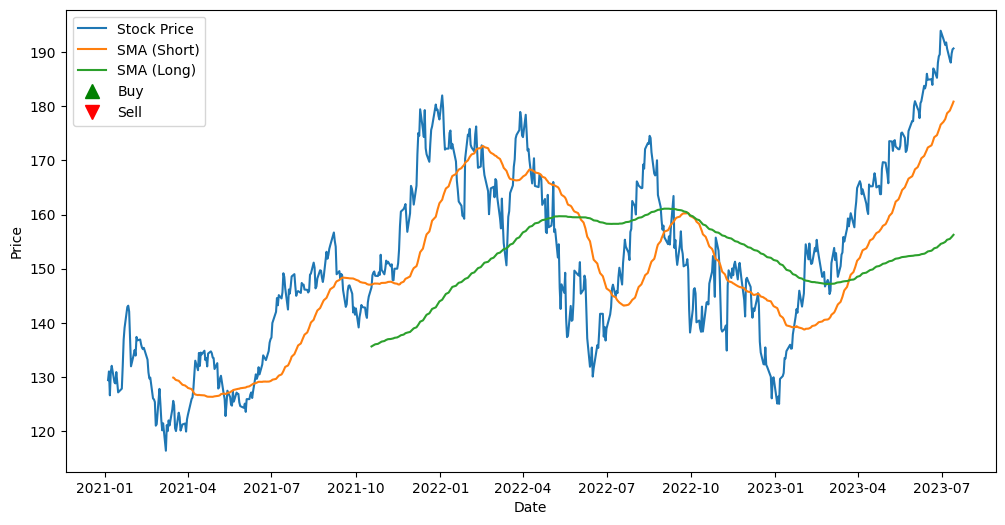

In [5]:
# Fetch historical stock data
symbol = 'AAPL'  # Example stock symbol (Apple)
start_date = '2021-01-01'
end_date = '2023-07-15'
stock_data = get_stock_data(symbol, start_date, end_date)

# Apply SMA crossover strategy
short_window = 50
long_window = 200
strategy_data = sma_crossover_strategy(stock_data, short_window, long_window)

# Plot strategy performance
plot_strategy_performance(strategy_data)